In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

In [71]:
def coefs_rl(x, y):
    xMoño = x.mean()
    yMoño = y.mean()
    b11 = 0
    b12 = 0
    a = 0
    for i in range (0, len(x) - 1):
        a = (x[i] - xMoño) * (y[i] - yMoño)
        b11 = b11 + a
    for i in range (0, len(x) - 1):
        b12 = b12 + ((x[i] - xMoño)**2)
    beta_1 = b11/b12
    beta_0 = yMoño - beta_1 * xMoño
    return beta_1 , beta_0


In [72]:
coefs_rl(pd.Series([1,2,3,4]), pd.Series([5,6,7,8]))

(1.0, 4.0)

In [73]:
pip install gapminder

In [74]:
from gapminder import gapminder
display(gapminder)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [87]:
datos = gapminder
print(coefs_rl (datos ["year"] , datos ["lifeExp"]))


(0.3272574039087492, -588.3315916711719)


In [78]:
modelo = linear_model.LinearRegression()
modelo.fit(datos [["year"]] , datos [["lifeExp"]])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print(beta_1 , beta_0)


0.32590382763715164 -585.6521874415445


In [130]:
datos = pd.read_csv('inmuebles.csv')
#display (datos)
display(datos)

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3
...,...,...,...
164,116.0,525.953698,Zona 3
165,118.0,582.190837,Zona 3
166,52.0,200.256009,Zona 1
167,37.0,151.569142,Zona 1


C:\Users\matic\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


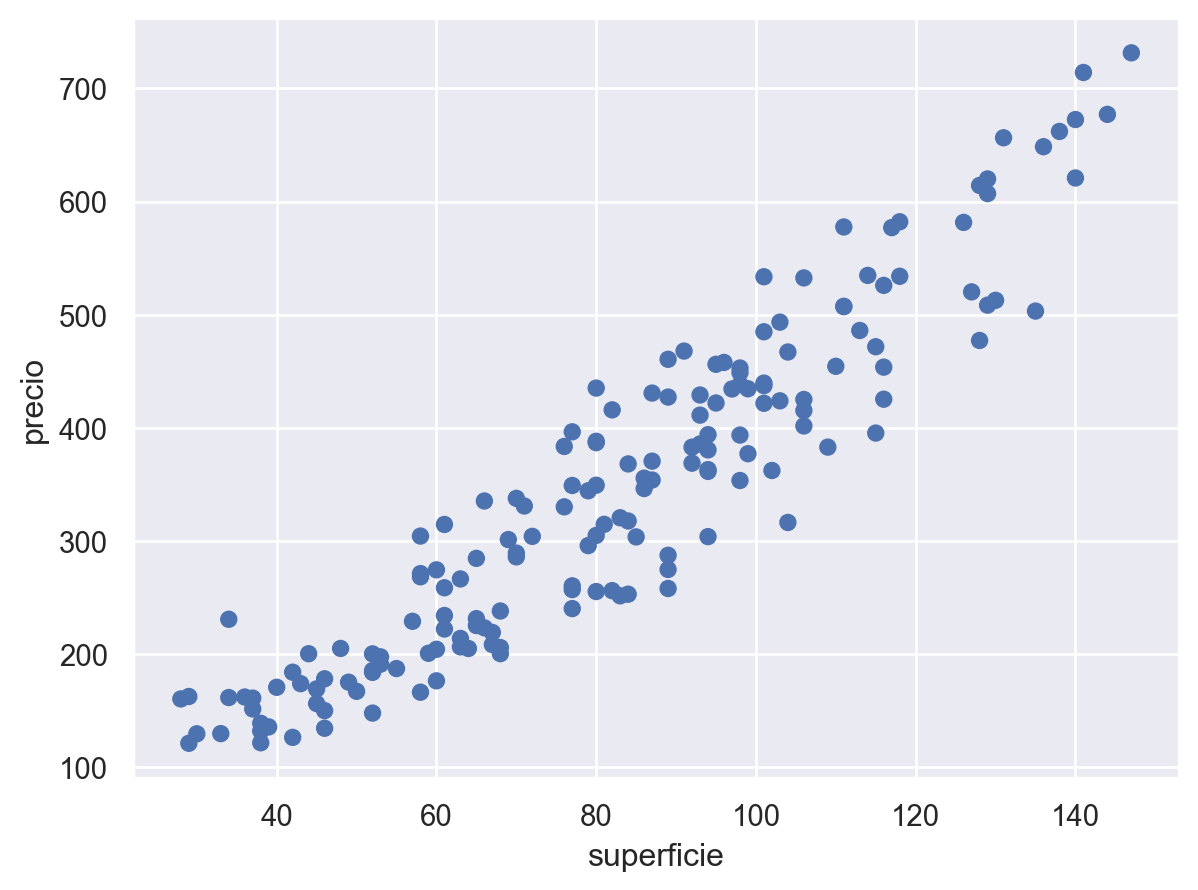

In [135]:
(
    so.Plot(data = datos, x = "superficie", y = "precio")
        .add(so.Dot())
)

C:\Users\matic\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\matic\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


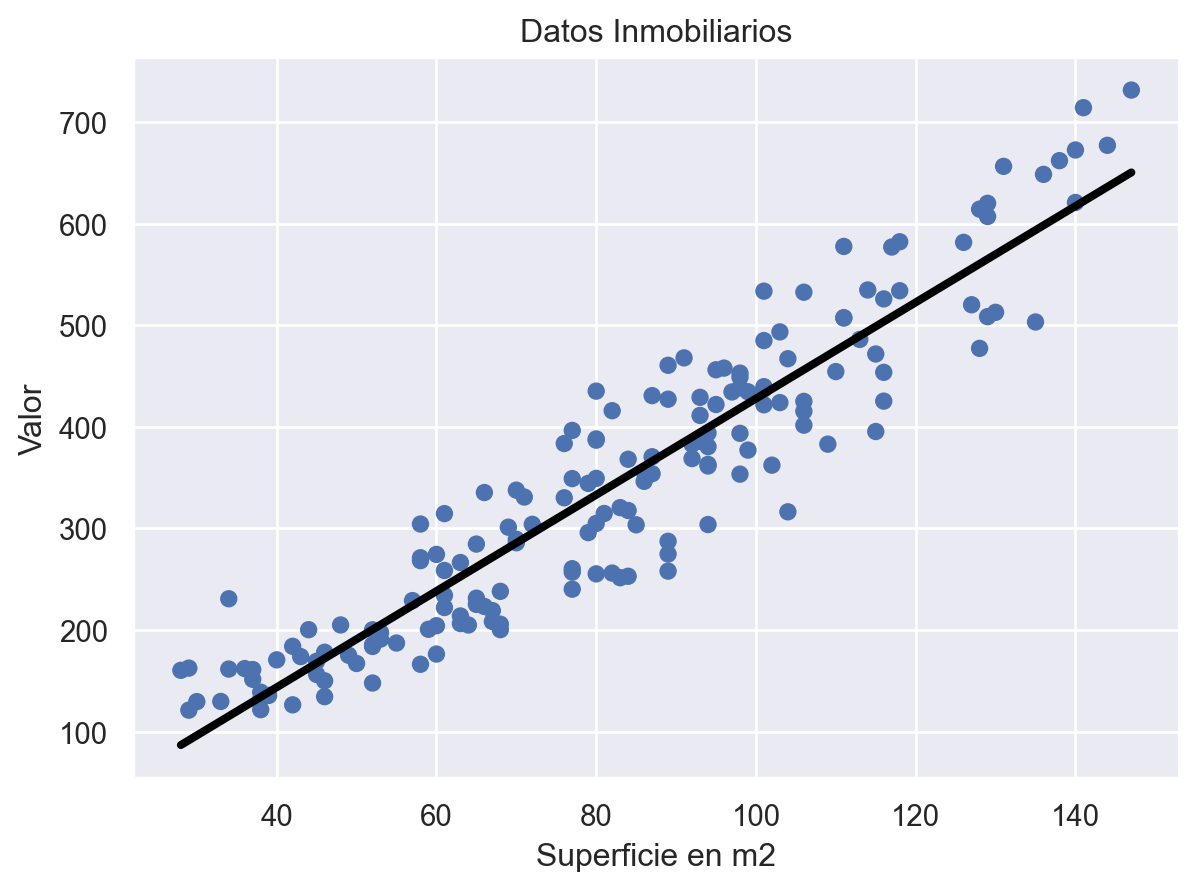

In [109]:
(
    so.Plot(data = datos, x = "superficie", y = "precio")
        .add(so.Dot())
        .add(so.Line(color = "black", linewidth = 3), so.PolyFit(1))
        .label (title = "Datos Inmobiliarios", x ="Superficie en m2", y = "Valor")
)

In [115]:
modelo = linear_model.LinearRegression()
modelo.fit(datos[["superficie"]], datos[["precio"]])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print(beta_1 , beta_0)


4.735796822302392 -45.73153403092584


In [116]:
y_pred = modelo.predict(datos[['superficie']])
r2_score(datos[['precio']], y_pred)

0.8762114698357936

In [117]:
mean_squared_error(datos[['precio']], y_pred)

2630.9300019446955

<Axes: xlabel='zona', ylabel='precio'>

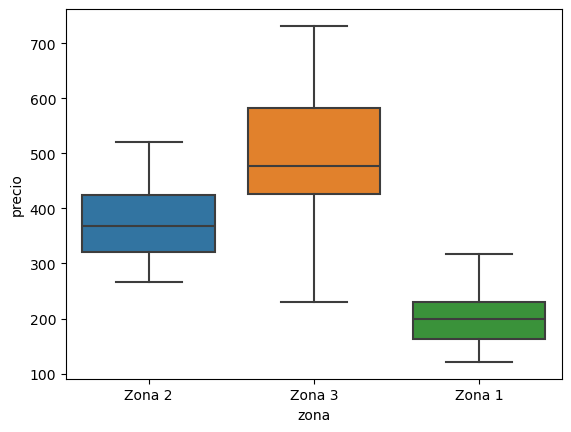

In [129]:
(
    sns.boxplot (datos, x = "zona", y = "precio")
)